In [22]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from random import randrange, getrandbits
%matplotlib inline
from timeit import default_timer as timer

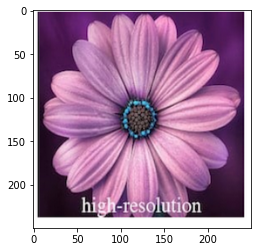

In [23]:
my_img = cv2.imread('originalImage.png')
# cv2_imshow(my_img)
plt.imshow(my_img)

In [24]:
def power(a,d,n):
  ans=1;
  while d!=0:
    if d%2==1:
      ans=((ans%n)*(a%n))%n
    a=((a%n)*(a%n))%n
    d>>=1
  return ans;


def MillerRabin(N,d):
  a = randrange(2, N - 1)
  x=power(a,d,N);
  if x==1 or x==N-1:
    return True;
  else:
    while(d!=N-1):
      x=((x%N)*(x%N))%N;
      if x==1:
        return False;
      if x==N-1:
        return True;
      d<<=1;
  return False;


In [25]:
def is_prime(N,K):
  if N==3 or N==2:
    return True;
  if N<=1 or N%2==0:
    return False;
  
  #Find d such that d*(2^r)=X-1
  d=N-1
  while d%2!=0:
    d/=2;

  for _ in range(K):
    if not MillerRabin(N,d):
      return False;
  return True;  
  



def generate_prime_candidate(length):
  # generate random bits
  p = getrandbits(length)
  # apply a mask to set MSB and LSB to 1
  # Set MSB to 1 to make sure we have a Number of 1024 bits.
  # Set LSB to 1 to make sure we get a Odd Number.
  p |= (1 << length - 1) | 1
  return p

In [26]:
def generatePrimeNumber(length):
  A=4
  while not is_prime(A, 128):
        A = generate_prime_candidate(length)
  return A



length=5
P=generatePrimeNumber(length)
Q=generatePrimeNumber(length)

print(P)
print(Q)

19
29


In [27]:
N=P*Q
eulerTotient=(P-1)*(Q-1)
print(N)
print(eulerTotient)

551
504


In [28]:
def GCD(a,b):
  if a==0:
    return b;
  return GCD(b%a,a)

E=generatePrimeNumber(4)
while GCD(E,eulerTotient)!=1:
  E=generatePrimeNumber(4)
print(E)

13


In [29]:
def gcdExtended(E,eulerTotient):
  a1,a2,b1,b2,d1,d2=1,0,0,1,eulerTotient,E

  while d2!=1:

    # k
    k=(d1//d2)

    #a
    temp=a2
    a2=a1-(a2*k)
    a1=temp

    #b
    temp=b2
    b2=b1-(b2*k)
    b1=temp

    #d
    temp=d2
    d2=d1-(d2*k)
    d1=temp

    D=b2

  if D>eulerTotient:
    D=D%eulerTotient
  elif D<0:
    D=D+eulerTotient

  return D


D=gcdExtended(E,eulerTotient)
print(D)

349


In [30]:
row,col=my_img.shape[0],my_img.shape[1]
enc = [[0 for x in range(3000)] for y in range(3000)]
row


250

In [31]:
col

250

Encryption Time: 3.192411461000006


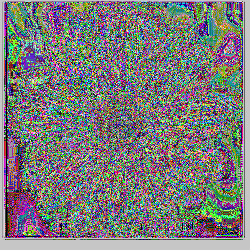

In [32]:
start = timer()
for i in range(0,250):
  for j in range(0,250):
    r,g,b=my_img[i,j]
    C1=power(r,E,N)
    C2=power(g,E,N)
    C3=power(b,E,N)
    enc[i][j]=[C1,C2,C3]
    C1=C1%256
    C2=C2%256
    C3=C3%256
    my_img[i,j]=[C1,C2,C3]
end = timer()
print("Encryption Time:", (end-start))
cv2_imshow(my_img)

Dncryption Time: 13.378414055000007


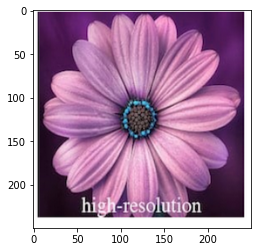

In [33]:
#Step 6: Decryption
start = timer()
for i in range(0,250):
  for j in range(0,250):
    r,g,b=enc[i][j]
    M1=power(r,D,N)
    M2=power(g,D,N)
    M3=power(b,D,N)
    my_img[i,j]=[M1,M2,M3]
end = timer()
print("Dnecryption Time: ", (end - start))
#cv2_imshow(my_img)
plt.imshow(my_img)

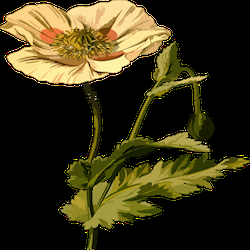

In [35]:
flower_img = cv2.imread('flower.png')
cv2_imshow(flower_img)
#plt.imshow(flower_img)

In [36]:
row1,col=flower_img.shape[0],flower_img.shape[1]
enc = [[0 for x in range(3000)] for y in range(3000)]
row1

250

In [37]:
col

250

Encryption Time: 3.09290153500001


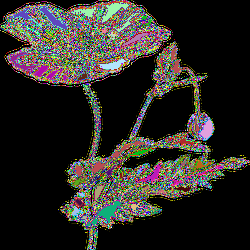

In [38]:
start = timer()
for i in range(0,250):
  for j in range(0,250):
    r,g,b=flower_img[i,j]
    C1=power(r,E,N)
    C2=power(g,E,N)
    C3=power(b,E,N)
    enc[i][j]=[C1,C2,C3]
    C1=C1%256
    C2=C2%256
    C3=C3%256
    flower_img[i,j]=[C1,C2,C3]
end = timer()
print("Encryption Time:", (end-start))
cv2_imshow(flower_img)

Dnecryption Time:  13.45698908299994


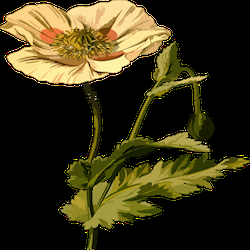

In [42]:
#Step 6: Decryption
start = timer()
for i in range(0,250):
  for j in range(0,250):
    r,g,b=enc[i][j]
    M1=power(r,D,N)
    M2=power(g,D,N)
    M3=power(b,D,N)
    flower_img[i,j]=[M1,M2,M3]
end = timer()
print("Dnecryption Time: ", (end - start))
cv2_imshow(flower_img)
#plt.imshow(flower_img)

**Time Comparison Start Here**

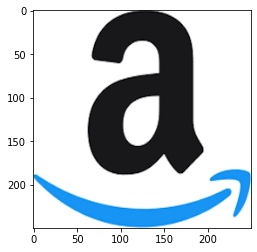

In [52]:
from timeit import default_timer as timer
amazon_img = cv2.imread('amazon.png')
#cv2_imshow(amazon_img)
plt.imshow(amazon_img)

In [53]:

row1,col=amazon_img.shape[0],amazon_img.shape[1]
enc = [[0 for x in range(3000)] for y in range(3000)]
row

250

In [54]:
col

250

Encrypted Time: 2.7482612320000044


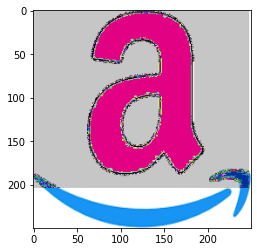

In [55]:
start = timer()
for i in range(0,204):
  for j in range(0,248):
    r,g,b=amazon_img[i,j]
    C1=power(r,E,N)
    C2=power(g,E,N)
    C3=power(b,E,N)
    enc[i][j]=[C1,C2,C3]
    C1=C1%256
    C2=C2%256
    C3=C3%256
    amazon_img[i,j]=[C1,C2,C3]
end = timer()
print("Encrypted Time:", (end - start))
plt.imshow(amazon_img)



Dnecryption Time:  12.785202017000074


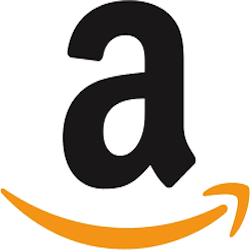

In [56]:
#Step 6: Decryption
start = timer()
for i in range(0,204):
  for j in range(0,248):
    r,g,b = enc[i][j]
    M1=power(r,D,N)
    M2=power(g,D,N)
    M3=power(b,D,N)
    amazon_img[i,j]=[M1,M2,M3]
end = timer()
print("Dnecryption Time: ", (end - start))
cv2_imshow(amazon_img)
#plt.imshow(flower_img)

Another Time Comparison

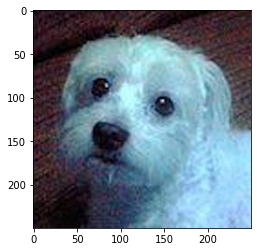

In [71]:
from timeit import default_timer as timer
dog_img = cv2.imread('dog.png')
#dog_imshow(dog_img)
plt.imshow(dog_img)

In [72]:

row1,col=dog_img.shape[0],dog_img.shape[1]
enc = [[0 for x in range(3000)] for y in range(3000)]
row

250

In [73]:
col

250

Encrypted Time: 3.8727255539999987


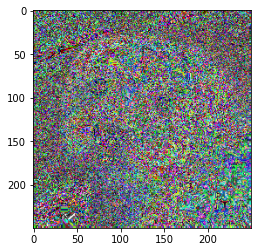

In [74]:
start = timer()
for i in range(0,250):
  for j in range(0,250):
    r,g,b=dog_img[i,j]
    C1=power(r,E,N)
    C2=power(g,E,N)
    C3=power(b,E,N)
    enc[i][j]=[C1,C2,C3]
    C1=C1%256
    C2=C2%256
    C3=C3%256
    dog_img[i,j]=[C1,C2,C3]
end = timer()
print("Encrypted Time:", (end - start))
plt.imshow(dog_img)

Decryption Time: 10.461092363000034


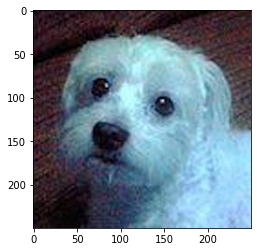

In [75]:
#Step 6: Decryption
start = timer()
for i in range(0,250):
  for j in range(0,250):
    r,g,b=enc[i][j]
    M1=power(r,D,N)
    M2=power(g,D,N)
    M3=power(b,D,N)
    dog_img[i,j]=[M1,M2,M3]

#cv2_imshow(pretty_img)
end = timer()
print("Decryption Time:", (end-start))
#cv2_imshow(amazon_img)
plt.imshow(dog_img)

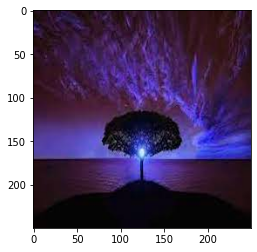

In [76]:
from timeit import default_timer as timer
scene_img = cv2.imread('scene.png')
plt.imshow(scene_img)

Encrypted Time: 4.214363994999985


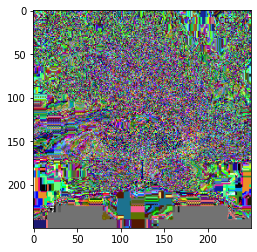

In [77]:
start = timer()
row1,col=scene_img.shape[0],scene_img.shape[1]
enc = [[0 for x in range(3000)] for y in range(3000)]

for i in range(0,250):
  for j in range(0,250):
    r,g,b=scene_img[i,j]
    C1=power(r,E,N)
    C2=power(g,E,N)
    C3=power(b,E,N)
    enc[i][j]=[C1,C2,C3]
    C1=C1%256
    C2=C2%256
    C3=C3%256
    scene_img[i,j]=[C1,C2,C3]
end = timer()
print("Encrypted Time:", (end - start))
plt.imshow(scene_img)

Decryption Time: 12.452398654000035


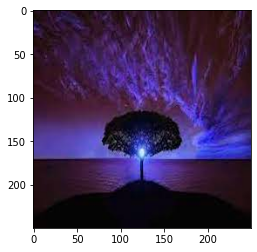

In [79]:
#Step 6: Decryption
start = timer()
for i in range(0,250):
  for j in range(0,250):
    r,g,b=enc[i][j]
    M1=power(r,D,N)
    M2=power(g,D,N)
    M3=power(b,D,N)
    scene_img[i,j]=[M1,M2,M3]

#cv2_imshow(scene_img)
end = timer()
print("Decryption Time:", (end-start))
#cv2_imshow(scene_img)
plt.imshow(scene_img)

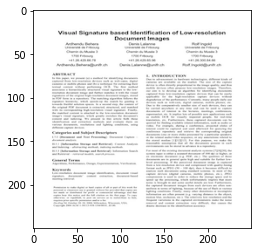

In [80]:
from timeit import default_timer as timer
docs_img = cv2.imread('docs.png')
plt.imshow(docs_img)

Encrypted Time: 4.052448432999881


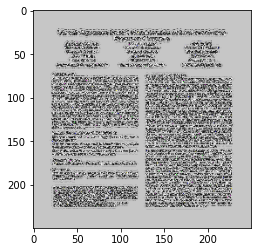

In [81]:
start = timer()
row1,col=docs_img.shape[0],docs_img.shape[1]
enc = [[0 for x in range(3000)] for y in range(3000)]

for i in range(0,250):
  for j in range(0,250):
    r,g,b=docs_img[i,j]
    C1=power(r,E,N)
    C2=power(g,E,N)
    C3=power(b,E,N)
    enc[i][j]=[C1,C2,C3]
    C1=C1%256
    C2=C2%256
    C3=C3%256
    docs_img[i,j]=[C1,C2,C3]
end = timer()
print("Encrypted Time:", (end - start))
plt.imshow(docs_img)

Decryption Time: 12.344080738000002


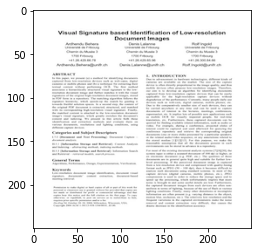

In [82]:
#Step 6: Decryption
start = timer()
for i in range(0,250):
  for j in range(0,250):
    r,g,b=enc[i][j]
    M1=power(r,D,N)
    M2=power(g,D,N)
    M3=power(b,D,N)
    docs_img[i,j]=[M1,M2,M3]

#cv2_imshow(docs_img)
end = timer()
print("Decryption Time:", (end-start))
#cv2_imshow(docs_img)
plt.imshow(docs_img)

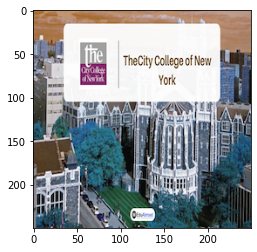

In [83]:
from timeit import default_timer as timer
our_campas_img = cv2.imread('our_campas.png')
plt.imshow(our_campas_img)

Encrypted Time: 4.028410853000196


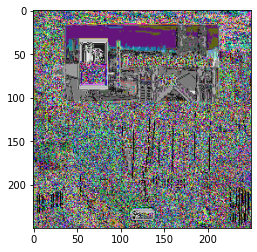

In [84]:
start = timer()
row1,col=our_campas_img.shape[0],our_campas_img.shape[1]
enc = [[0 for x in range(3000)] for y in range(3000)]

for i in range(0,250):
  for j in range(0,250):
    r,g,b=our_campas_img[i,j]
    C1=power(r,E,N)
    C2=power(g,E,N)
    C3=power(b,E,N)
    enc[i][j]=[C1,C2,C3]
    C1=C1%256
    C2=C2%256
    C3=C3%256
    our_campas_img[i,j]=[C1,C2,C3]
end = timer()
print("Encrypted Time:", (end - start))
plt.imshow(our_campas_img)

Decryption Time: 14.28261217399995


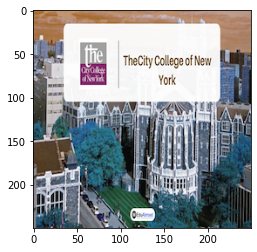

In [85]:
#Step 6: Decryption
start = timer()
for i in range(0,250):
  for j in range(0,250):
    r,g,b=enc[i][j]
    M1=power(r,D,N)
    M2=power(g,D,N)
    M3=power(b,D,N)
    our_campas_img[i,j]=[M1,M2,M3]

#cv2_imshow(our_campas_img)
end = timer()
print("Decryption Time:", (end-start))
#cv2_imshow(our_campas_img)
plt.imshow(our_campas_img)